In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# additional cleaning

In [31]:
def get_fatigue_task(file):
    '''
    Takes file name of task data and returns DataFrame of response, position,
    and reaction time for each fatigue trial.
    '''

    raw_df = pd.read_csv(file)
    df = pd.DataFrame()
    # Only get response rows
    mask = raw_df["Response Type"] == "response"

    # Extract relevant columns
    df["Participant ID"] = raw_df[mask]["Participant Private ID"].astype(int)
    cols = ["Display",
            "Response",
            "Reaction Time",
            "Spreadsheet: Product",
            "Spreadsheet: correct",
            "Spreadsheet: Discount 1",
            "Spreadsheet: Discount 2",
            "Spreadsheet: Discount 3",
            "Spreadsheet: Discount 4"]
    for col in cols:
        df[col] = raw_df[mask][col]

    # Filter for rows where 'Display' contains 'Fatigue'
    df = df[df["Display"].str.contains("Discounts Fatigue", case=False, na=False)]

    # Merge position and response rows
    df = df.reset_index(drop=True)
    merged_rows = []

    for i in range(0, len(df)-1, 2):
        row1 = df.iloc[i]
        row2 = df.iloc[i + 1]

        # correct
        correct_field = row1.get('Spreadsheet: correct', None)

        if correct_field:  
            match = re.search(r'(\d+)', str(correct_field))
            discount_num = match.group(1)
            correct_answer_col = f"Spreadsheet: Discount {discount_num}"
            correct = str(row1[correct_answer_col]).strip() == str(row1['Response']).strip()
        else:
            correct = None


        merged_row = {
            "Participant ID": row1["Participant ID"],
            "Display": row1["Display"],
            "Spreadsheet: Product": row1["Spreadsheet: Product"],
            "Response": row1["Response"],        # The actual choice
            "Position": row2["Response"],        # The position
            "Reaction Time": row1["Reaction Time"],
            "Correct": correct
        }

        if "now" in merged_row["Response"]:
            merged_row["Deal Type"] = "Now price"
        elif "get" in merged_row["Response"]:
            merged_row["Deal Type"] = "BOGO"
        elif r"% off" in merged_row["Response"]:
            merged_row["Deal Type"] = "Percentage off"
        else:
            merged_row["Deal Type"] = "Dollar off"

        merged_rows.append(merged_row)
    merged_df = pd.DataFrame(merged_rows)

    
    return merged_df

In [32]:
fatigue = get_fatigue_task(r'C:\Users\Annii\Documents\HL\Study\UChicago\25 Spring\DE\DE_Team2\full_pilot_data\data_exp_226813-vall_tasks.csv')

In [33]:
fatigue

,Participant ID,Display,Spreadsheet: Product,Response,Position,Reaction Time,Correct,Deal Type
0,13397659,3 Discounts Fatigue,Home Espresso Machine.png,$350 (Deal: $50 off),Position 3,13230.5,False,Dollar off
1,13397659,2 Discounts Fatigue,Leather Wallet.png,$70 (Deal: now $58),Position 2,13616.0,False,Now price
2,13397659,2 Discounts Fatigue,Wireless Charger.png,$60 (Deal: now $45),Position 2,8581.1,True,Now price
3,13397659,2 Discounts Fatigue,Fitness Tracker.png,$95 (Deal: now $80),Position 2,7899.8,True,Now price
4,13397659,3 Discounts Fatigue,Designer Backpack.png,$180 (Deal: $20 off),Position 1,27182.2,True,Dollar off
...,...,...,...,...,...,...,...,...
175,13444141,4 Discounts Fatigue,Running Shoes.png,$120 (Deal: buy 1 get 1 50% off),Position 1,36930.5,False,BOGO
176,13444141,4 Discounts Fatigue,Bluetooth Speaker.png,$90 (Deal: buy 1 get 1 free),Position 3,32174.2,True,BOGO
177,13444141,4 Discounts Fatigue,Electric Kettle.png,$35 (Deal: now $29),Position 2,48582.0,False,Now price
178,13444141,2 Discounts Fatigue,Fitness Tracker.png,$95 (Deal: now $80),Position 2,12384.3,True,Now price


# descriptive statistics

## demographic

In [15]:
import re

In [2]:
df = pd.read_csv("DE_Team2/processed_pilot_data/demographics.csv")

# Rename columns for easier access (optional but recommended)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace(r"[^\w]", "", regex=True)

In [3]:
df.head()

,Participant_ID,Please_indicate_your_age,Please_indicate_your_gender,Are_you_HispanicLatino,What_is_the_highest_level_of_education_you_have_completed,Which_of_the_following_best_describes_your_total_annual_personal_income_before_taxes,Are_you_located_in_the_United_States,How_often_do_you_shop_online,American_Indian_or_Alaskan_Native,Asian,Black_or_African_American,Native_Hawaiian_and_Other_Pacific_Islander,White,__other,Other
0,13397659,18–24 years old,Female,No,"Master's degree (e.g., MA, MS, MBA)","Less than $20,000",Yes,About once a month,0,1,0,0,0,0,NaN
1,13397665,18–24 years old,Female,No,"Bachelor's degree (e.g., BA, BS)","$20,000–$39,999",Yes,Once a week,0,1,0,0,0,0,NaN
2,13397950,18–24 years old,Male,No,"Bachelor's degree (e.g., BA, BS)","Less than $20,000",Yes,Once a week,0,1,0,0,0,0,NaN
3,13398525,25–34 years old,Female,No,"Bachelor's degree (e.g., BA, BS)","$20,000–$39,999",Yes,Less than once a month,0,0,0,0,1,0,NaN
4,13398617,25–34 years old,Female,No,"Bachelor's degree (e.g., BA, BS)","Less than $20,000",Yes,Multiple times a week,0,1,0,0,0,0,NaN


In [4]:
categorical_cols = [
    "Please_indicate_your_age",
    "Please_indicate_your_gender",
    "Are_you_HispanicLatino",
    "What_is_the_highest_level_of_education_you_have_completed",
    "Which_of_the_following_best_describes_your_total_annual_personal_income_before_taxes",
    "Are_you_located_in_the_United_States",
    "How_often_do_you_shop_online"
]
race_columns = [
    "American_Indian_or_Alaskan_Native",
    "Asian",
    "Black_or_African_American",
    "Native_Hawaiian_and_Other_Pacific_Islander",
    "White",
    "__other",
    "Other"
]

In [5]:
for col in categorical_cols:
    print(f"\n{col.replace('_', ' ')}:")
    print(df[col].value_counts(dropna=False))
    print("Percentages:")
    print(df[col].value_counts(normalize=True, dropna=False) * 100)



Please indicate your age:
Please_indicate_your_age
18–24 years old    11
25–34 years old     9
Name: count, dtype: int64
Percentages:
Please_indicate_your_age
18–24 years old    55.0
25–34 years old    45.0
Name: proportion, dtype: float64

Please indicate your gender:
Please_indicate_your_gender
Female               12
Male                  7
Prefer not to say     1
Name: count, dtype: int64
Percentages:
Please_indicate_your_gender
Female               60.0
Male                 35.0
Prefer not to say     5.0
Name: proportion, dtype: float64

Are you HispanicLatino:
Are_you_HispanicLatino
No     18
Yes     2
Name: count, dtype: int64
Percentages:
Are_you_HispanicLatino
No     90.0
Yes    10.0
Name: proportion, dtype: float64

What is the highest level of education you have completed:
What_is_the_highest_level_of_education_you_have_completed
Bachelor's degree (e.g., BA, BS)                        15
Master's degree (e.g., MA, MS, MBA)                      3
High school diploma or equiv

In [6]:
race_counts = df[race_columns].sum().sort_values(ascending=False)
race_percent = (race_counts / len(df)) * 100
race_summary = pd.DataFrame({
    "Count": race_counts,
    "Percent": race_percent.round(2)
})
print(race_summary)

                                            Count  Percent
Asian                                        15.0     75.0
White                                         4.0     20.0
Black_or_African_American                     1.0      5.0
American_Indian_or_Alaskan_Native             0.0      0.0
Native_Hawaiian_and_Other_Pacific_Islander    0.0      0.0
__other                                       0.0      0.0
Other                                         0.0      0.0


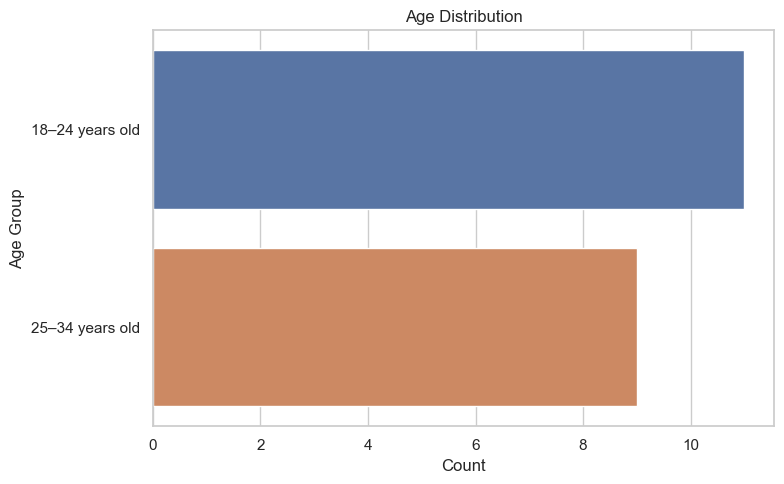

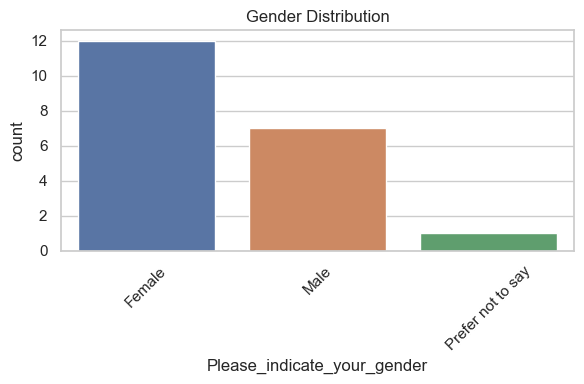

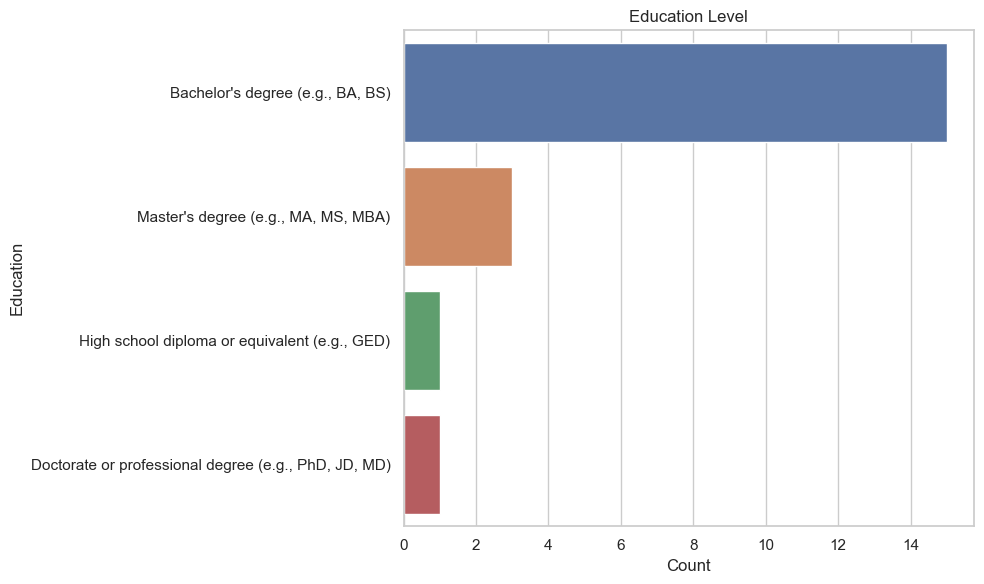

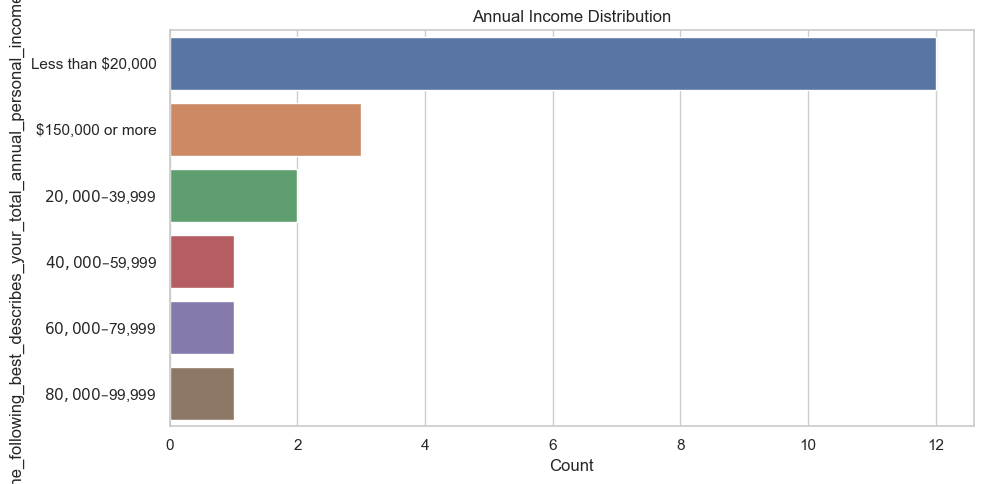

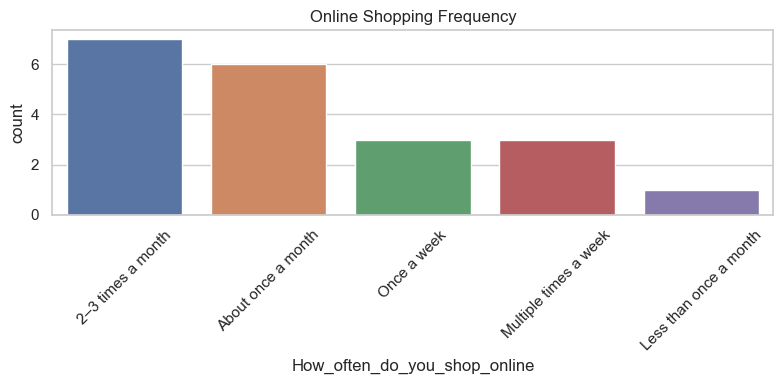

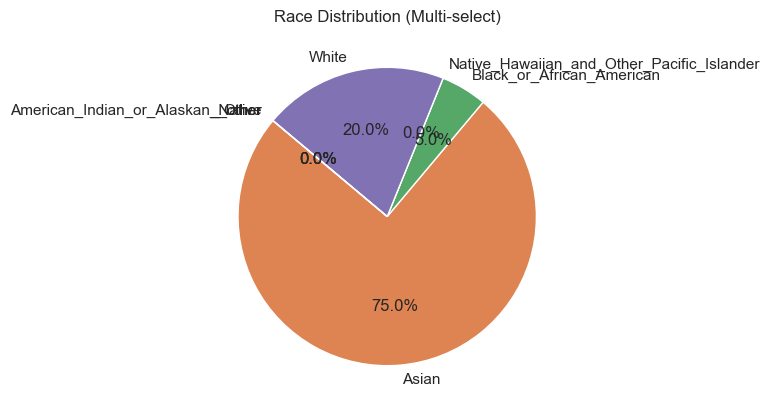

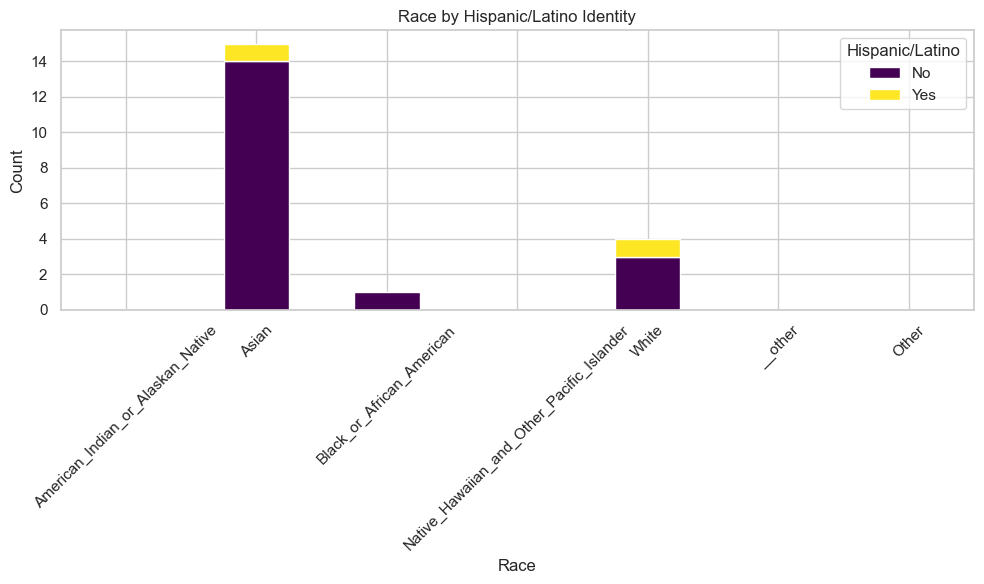

In [8]:
# Set Seaborn style
sns.set(style="whitegrid")

# 1. Bar chart: Age Distribution
plt.figure(figsize=(8, 5))
sns.countplot(y="Please_indicate_your_age", data=df, order=df["Please_indicate_your_age"].value_counts().index)
plt.title("Age Distribution")
plt.xlabel("Count")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

# 2. Bar chart: Gender
plt.figure(figsize=(6, 4))
sns.countplot(x="Please_indicate_your_gender", data=df)
plt.title("Gender Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Bar chart: Education
plt.figure(figsize=(10, 6))
sns.countplot(y="What_is_the_highest_level_of_education_you_have_completed", data=df,
              order=df["What_is_the_highest_level_of_education_you_have_completed"].value_counts().index)
plt.title("Education Level")
plt.xlabel("Count")
plt.ylabel("Education")
plt.tight_layout()
plt.show()

# 4. Bar chart: Income
plt.figure(figsize=(10, 5))
sns.countplot(y="Which_of_the_following_best_describes_your_total_annual_personal_income_before_taxes",
              data=df, order=df["Which_of_the_following_best_describes_your_total_annual_personal_income_before_taxes"].value_counts().index)
plt.title("Annual Income Distribution")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

# 5. Bar chart: Online Shopping Frequency
plt.figure(figsize=(8, 4))
sns.countplot(x="How_often_do_you_shop_online", data=df,
              order=df["How_often_do_you_shop_online"].value_counts().index)
plt.title("Online Shopping Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Pie chart: Race (multi-select)
race_columns = [
    "American_Indian_or_Alaskan_Native",
    "Asian",
    "Black_or_African_American",
    "Native_Hawaiian_and_Other_Pacific_Islander",
    "White",
    "__other",
    "Other"
]
race_counts = df[race_columns].sum()
plt.figure(figsize=(7, 7))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Race Distribution (Multi-select)")
plt.tight_layout()
plt.show()

# 7. Stacked Bar: Race × Hispanic
hispanic_col = "Are_you_HispanicLatino"
race_combo = df[race_columns].copy()
race_combo["Hispanic"] = df[hispanic_col]
race_grouped = race_combo.groupby("Hispanic").sum().T

race_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Race by Hispanic/Latino Identity")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Hispanic/Latino")
plt.tight_layout()
plt.show()

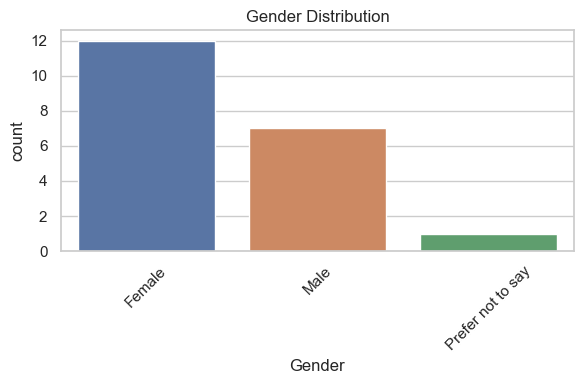

In [9]:
# 2. Bar chart: Gender
plt.figure(figsize=(6, 4))
sns.countplot(x="Please_indicate_your_gender", data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")  # <- Updated line
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


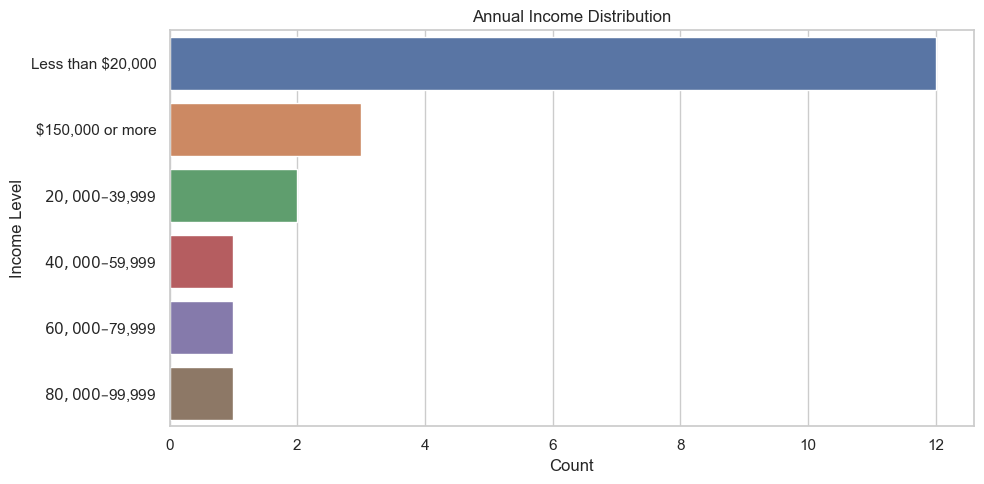

In [10]:
# 4. Bar chart: Income
plt.figure(figsize=(10, 5))
sns.countplot(
    y="Which_of_the_following_best_describes_your_total_annual_personal_income_before_taxes",
    data=df,
    order=df["Which_of_the_following_best_describes_your_total_annual_personal_income_before_taxes"].value_counts().index
)
plt.title("Annual Income Distribution")
plt.xlabel("Count")
plt.ylabel("Income Level")  # <- Updated line
plt.tight_layout()
plt.show()


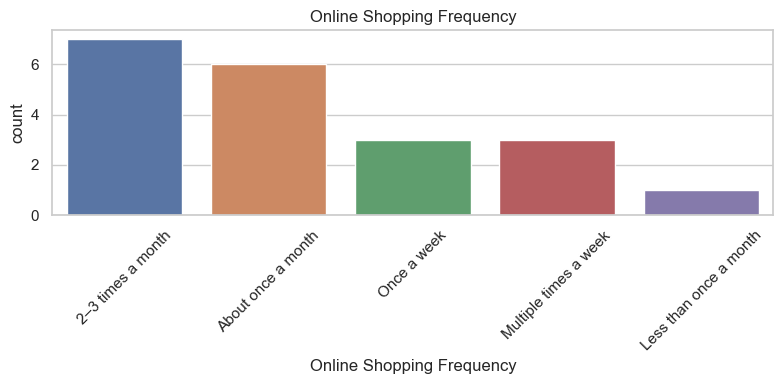

In [11]:
# 5. Bar chart: Online Shopping Frequency
plt.figure(figsize=(8, 4))
sns.countplot(
    x="How_often_do_you_shop_online",
    data=df,
    order=df["How_often_do_you_shop_online"].value_counts().index
)
plt.title("Online Shopping Frequency")
plt.xlabel("Online Shopping Frequency")  # <- Updated line
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


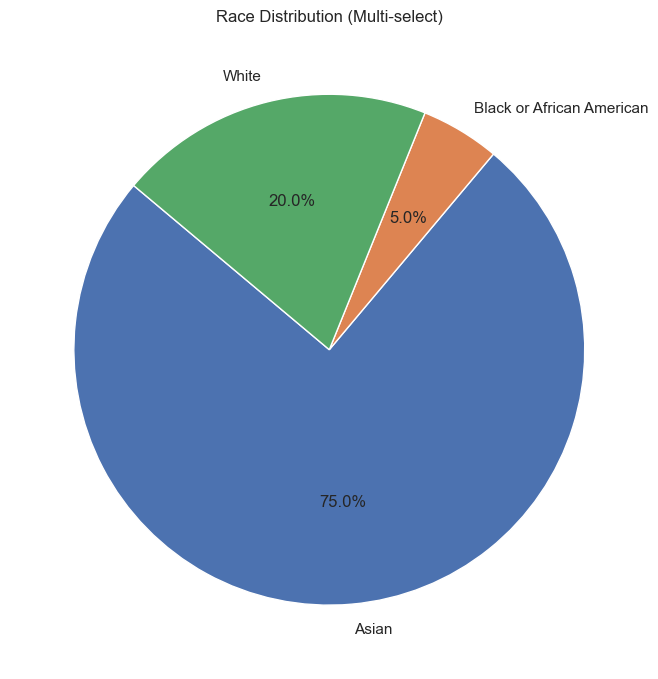

In [12]:
race_counts = df[race_columns].sum()
race_counts = race_counts[race_counts > 0]  # Remove zero-count races
race_counts.index = race_counts.index.str.replace("_", " ").str.replace("  ", " ")

# Plot
plt.figure(figsize=(7, 7))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Race Distribution (Multi-select)")
plt.tight_layout()
plt.show()

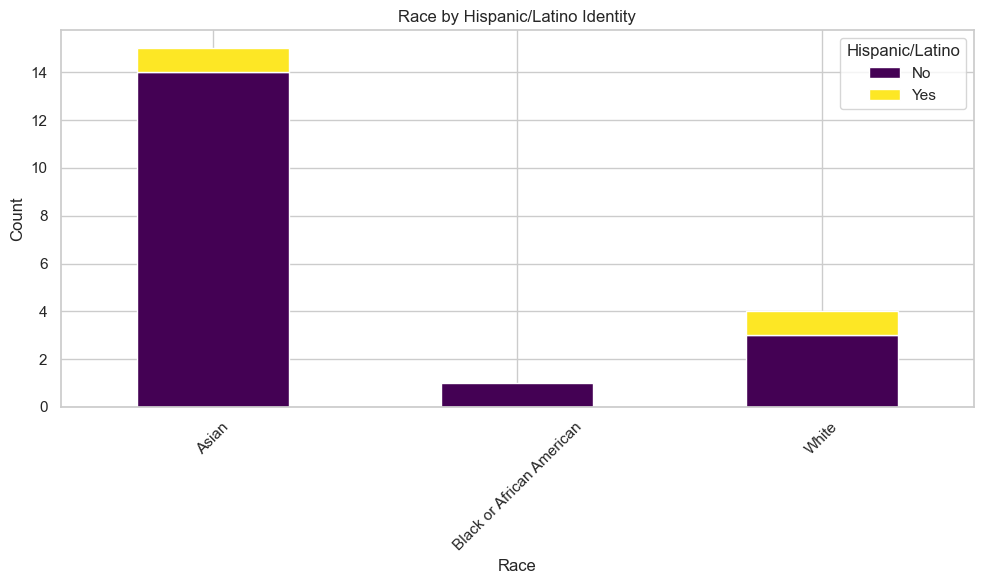

In [13]:
# Stacked Bar: Race × Hispanic
hispanic_col = "Are_you_HispanicLatino"
race_combo = df[race_columns].copy()
race_combo["Hispanic"] = df[hispanic_col]
race_grouped = race_combo.groupby("Hispanic").sum().T
race_grouped = race_grouped[race_grouped.sum(axis=1) > 0]  # Remove rows with 0s
race_grouped.index = race_grouped.index.str.replace("_", " ").str.replace("  ", " ")

# Plot
race_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Race by Hispanic/Latino Identity")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Hispanic/Latino")
plt.tight_layout()
plt.show()


## fake

In [103]:
fatigue = pd.read_csv("fatigue_trials.csv")


In [104]:
fatigue

,Participant ID,Display,Spreadsheet: Product,Response,Position,Reaction Time,Deal Type,correct response,accuracy
0,13397659,3 Discounts Fatigue,Home Espresso Machine.png,$350 (Deal: $50 off),Position 3,13230.5,Dollar off,BOGO,False
1,13397659,2 Discounts Fatigue,Leather Wallet.png,$70 (Deal: now $58),Position 2,13616.0,Now price,Now price,True
2,13397659,2 Discounts Fatigue,Wireless Charger.png,$60 (Deal: now $45),Position 2,8581.1,Now price,Now price,True
3,13397659,2 Discounts Fatigue,Fitness Tracker.png,$95 (Deal: now $80),Position 2,7899.8,Now price,Now price,True
4,13397659,3 Discounts Fatigue,Designer Backpack.png,$180 (Deal: $20 off),Position 1,27182.2,Dollar off,Now price,False
...,...,...,...,...,...,...,...,...,...
175,13444141,4 Discounts Fatigue,Running Shoes.png,$120 (Deal: buy 1 get 1 50% off),Position 1,36930.5,BOGO,BOGO,True
176,13444141,4 Discounts Fatigue,Bluetooth Speaker.png,$90 (Deal: buy 1 get 1 free),Position 3,32174.2,BOGO,BOGO,True
177,13444141,4 Discounts Fatigue,Electric Kettle.png,$35 (Deal: now $29),Position 2,48582.0,Now price,Now price,True
178,13444141,2 Discounts Fatigue,Fitness Tracker.png,$95 (Deal: now $80),Position 2,12384.3,Now price,Now price,True


In [116]:
display_summary = fatigue.groupby('Display').agg(
    Correct_Rate=('accuracy', 'mean'),
    Avg_Reaction_Time=('Reaction Time', 'mean'),
    Most_Common_Position=('Position', lambda x: x.mode().iloc[0] if not x.mode().empty else None)
).reset_index()

# Deal Type distribution per display
deal_type_counts = fatigue.groupby(['Display', 'Deal Type']).size().unstack(fill_value=0).reset_index()
display_summary = pd.merge(display_summary, deal_type_counts, on='Display', how='left')

In [117]:
display_summary

,Display,Correct_Rate,Avg_Reaction_Time,Most_Common_Position,BOGO,Dollar off,Now price,Percentage off
0,2 Discounts Fatigue,0.800000,10789.959000,Position 1,0,19,30,11
1,3 Discounts Fatigue,0.650000,17846.153667,Position 2,15,13,26,6
2,4 Discounts Fatigue,0.716667,25026.711000,Position 2,37,3,17,3


In [109]:
individual_summary = fatigue.groupby('Participant ID').agg(
    Correct_Rate=('accuracy', 'mean'),
    Avg_Reaction_Time=('Reaction Time', 'mean'),
    N_Trials=('accuracy', 'count')
).reset_index()

c:\Users\Annii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


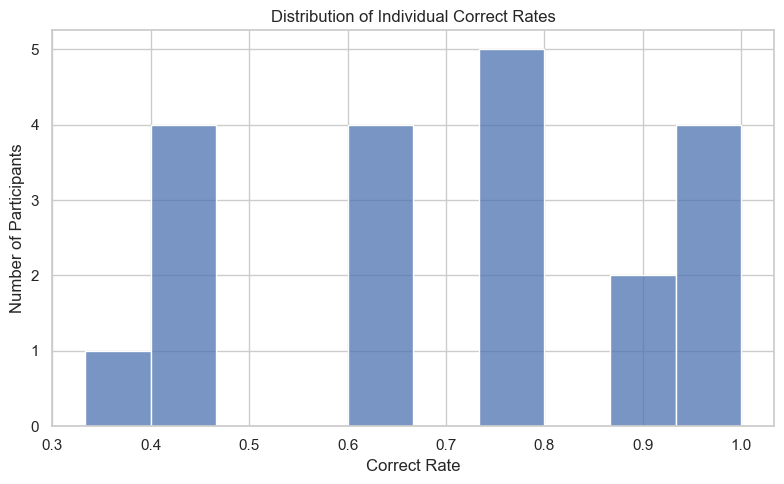

In [110]:
plt.figure(figsize=(8, 5))
sns.histplot(data=individual_summary, x='Correct_Rate', bins=10, kde=False)
plt.title('Distribution of Individual Correct Rates')
plt.xlabel('Correct Rate')
plt.ylabel('Number of Participants')
plt.tight_layout()
plt.show()


c:\Users\Annii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


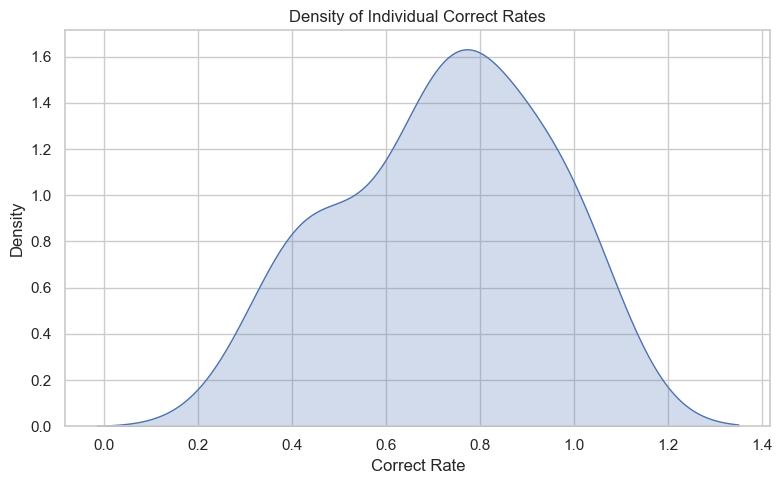

In [111]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=individual_summary, x='Correct_Rate', fill=True)
plt.title('Density of Individual Correct Rates')
plt.xlabel('Correct Rate')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


In [46]:
display_summary

,Display,Correct_Rate,Avg_Reaction_Time,Most_Common_Position,BOGO,Dollar off,Now price,Percentage off
0,2 Discounts Fatigue,0.35,10789.959000,Position 1,0,19,30,11
1,3 Discounts Fatigue,0.25,17846.153667,Position 2,15,13,26,6
2,4 Discounts Fatigue,0.25,25026.711000,Position 2,37,3,17,3


c:\Users\Annii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Annii\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


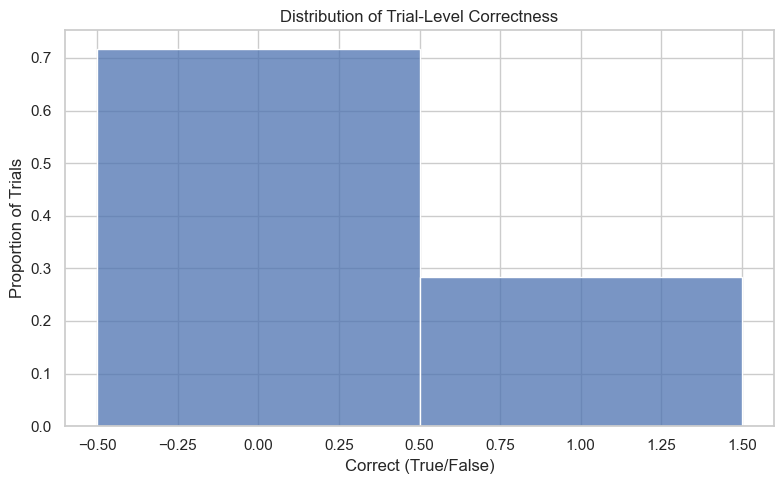

In [59]:
plt.figure(figsize=(8, 5))
sns.histplot(data=fatigue, x='Correct', stat='probability', discrete=True)
plt.title('Distribution of Trial-Level Correctness')
plt.xlabel('Correct (True/False)')
plt.ylabel('Proportion of Trials')
plt.tight_layout()
plt.show()


c:\Users\Annii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Annii\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


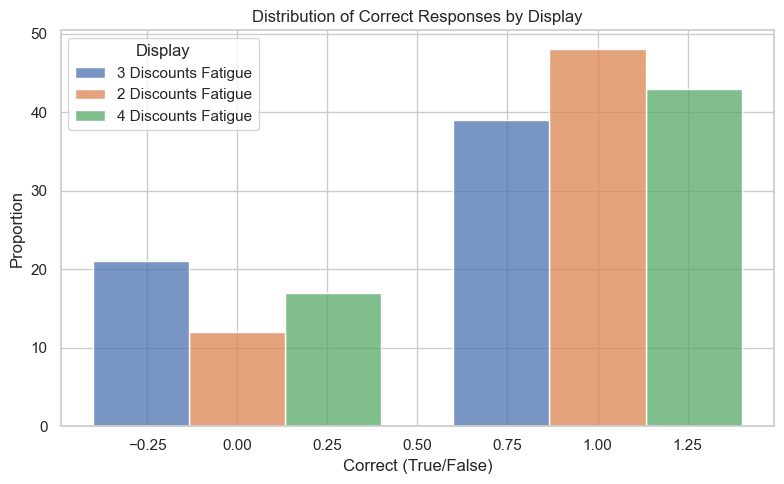

In [114]:
plt.figure(figsize=(8, 5))
sns.histplot(data=fatigue, x='accuracy', hue='Display', multiple='dodge', shrink=0.8, discrete=True)
plt.title('Distribution of Correct Responses by Display')
plt.xlabel('Correct (True/False)')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()


c:\Users\Annii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


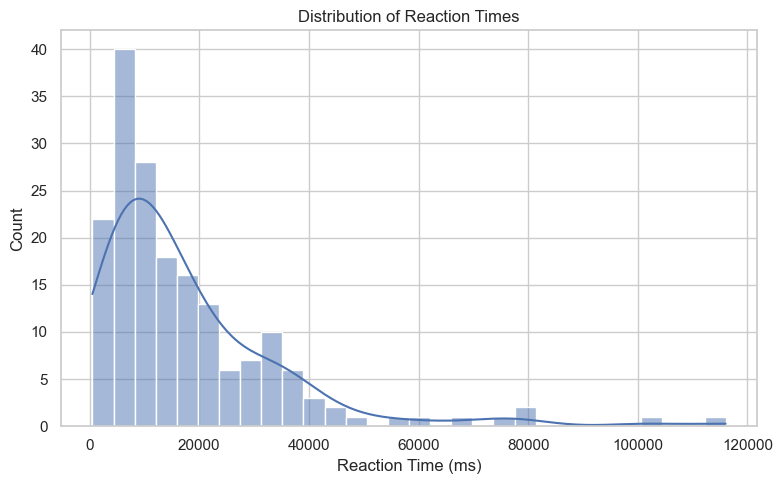

In [62]:
plt.figure(figsize=(8, 5))
sns.histplot(data=fatigue, x='Reaction Time', bins=30, kde=True)
plt.title('Distribution of Reaction Times')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


c:\Users\Annii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


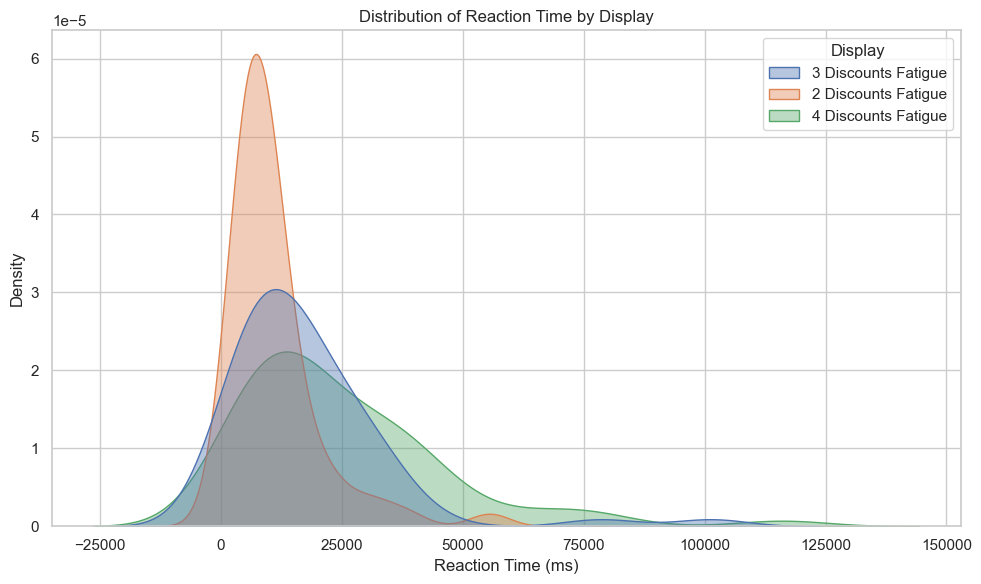

In [68]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=fatigue, x='Reaction Time', hue='Display', fill=True, common_norm=False, alpha=0.4)
plt.title('Distribution of Reaction Time by Display')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


c:\Users\Annii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


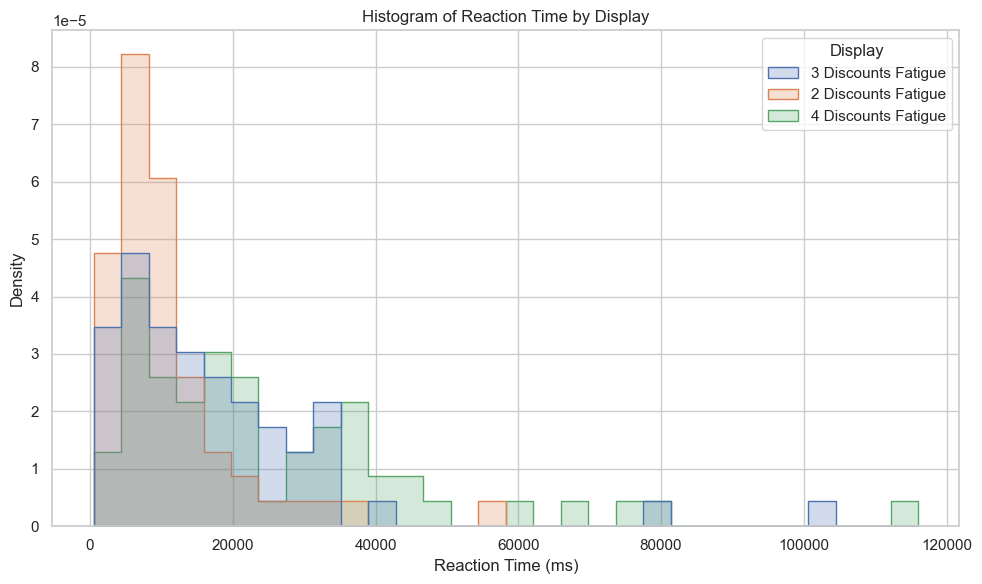

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(data=fatigue, x='Reaction Time', hue='Display', element='step', stat='density', common_norm=False, bins=30)
plt.title('Histogram of Reaction Time by Display')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


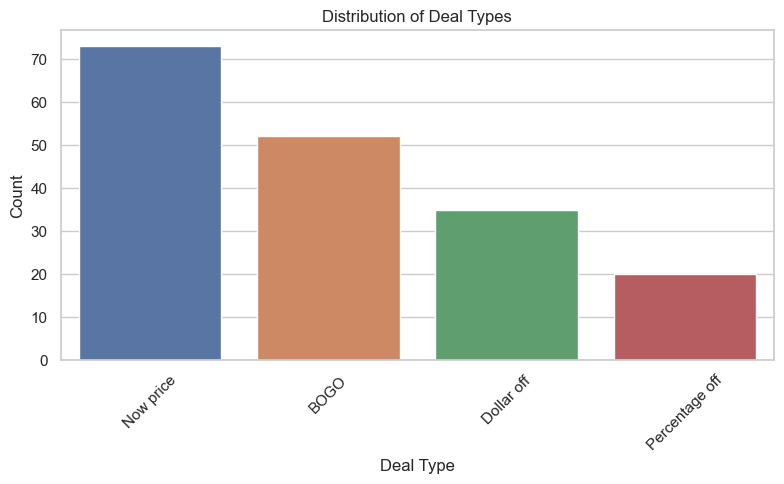

In [64]:
plt.figure(figsize=(8, 5))
sns.countplot(data=fatigue, x='Deal Type', order=fatigue['Deal Type'].value_counts().index)
plt.title('Distribution of Deal Types')
plt.xlabel('Deal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


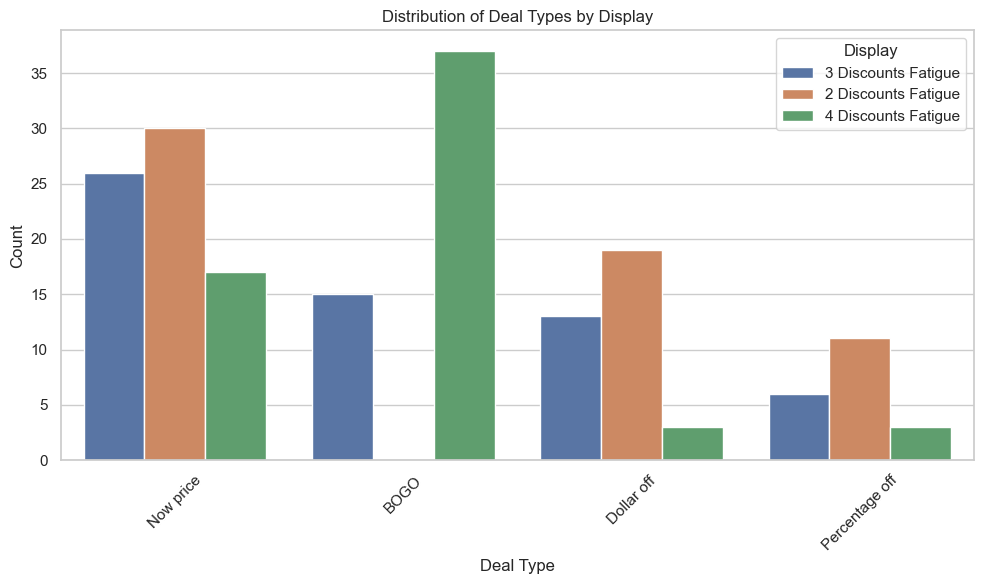

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(data=fatigue, x='Deal Type', hue='Display', order=fatigue['Deal Type'].value_counts().index)
plt.title('Distribution of Deal Types by Display')
plt.xlabel('Deal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [73]:
fatigue

,Participant ID,Display,Spreadsheet: Product,Response,Position,Reaction Time,Correct,Deal Type
0,13397659,3 Discounts Fatigue,Home Espresso Machine.png,$350 (Deal: $50 off),Position 3,13230.5,False,Dollar off
1,13397659,2 Discounts Fatigue,Leather Wallet.png,$70 (Deal: now $58),Position 2,13616.0,False,Now price
2,13397659,2 Discounts Fatigue,Wireless Charger.png,$60 (Deal: now $45),Position 2,8581.1,True,Now price
3,13397659,2 Discounts Fatigue,Fitness Tracker.png,$95 (Deal: now $80),Position 2,7899.8,True,Now price
4,13397659,3 Discounts Fatigue,Designer Backpack.png,$180 (Deal: $20 off),Position 1,27182.2,True,Dollar off
...,...,...,...,...,...,...,...,...
175,13444141,4 Discounts Fatigue,Running Shoes.png,$120 (Deal: buy 1 get 1 50% off),Position 1,36930.5,False,BOGO
176,13444141,4 Discounts Fatigue,Bluetooth Speaker.png,$90 (Deal: buy 1 get 1 free),Position 3,32174.2,True,BOGO
177,13444141,4 Discounts Fatigue,Electric Kettle.png,$35 (Deal: now $29),Position 2,48582.0,False,Now price
178,13444141,2 Discounts Fatigue,Fitness Tracker.png,$95 (Deal: now $80),Position 2,12384.3,True,Now price


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=fatigue, x='Position', hue='Display', order=sorted(fatigue['Position'].unique()))
plt.title('Distribution of Position Choices by Display')
plt.xlabel('Position')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## real

In [ ]:
df = pd.read_csv("DE_Team2/processed_pilot_data/main_trials.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [ ]:
def extract_display_number(display_string):
    """Extract the number of discounts from the 'Display' column, e.g., '3 Discount' -> 3."""
    try:
        return int(display_string.strip().split()[0])
    except:
        return None

df['Display_Num'] = df['Display'].apply(extract_display_number)
df['Attention_Check_Pass'] = df['Display_Num'] == df['Attention_Check_Response']

In [121]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Reaction_Time ~ C(Display)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq     df         F    PR(>F)
C(Display)  8.841674e+09    2.0  5.518447  0.005126
Residual    9.372889e+10  117.0       NaN       NaN


In [122]:
anova_table

,sum_sq,df,F,PR(>F)
C(Display),8.841674e+09,2.0,5.518447,0.005126
Residual,9.372889e+10,117.0,NaN,NaN


In [81]:
individual_summary = df.groupby('Participant_ID').agg(
    Avg_Reaction_Time=('Reaction_Time', 'mean'),
    Attention_Pass_Rate=('Attention_Check_Pass', 'mean'),
    N_Trials=('Display', 'count')
).reset_index()

In [82]:
individual_summary

,Participant_ID,Avg_Reaction_Time,Attention_Pass_Rate,N_Trials
0,13397659,12437.150000,1.000000,6
1,13397665,10274.233333,1.000000,6
2,13397950,10087.210000,1.000000,6
3,13398525,7416.400000,1.000000,6
4,13398617,5924.800000,1.000000,6
5,13401275,13212.133333,1.000000,6
6,13406543,11257.000000,1.000000,6
7,13414503,20442.750000,0.000000,6
8,13415449,56650.483333,1.000000,6
9,13415450,32250.283333,0.833333,6


In [118]:
display_summary = df.groupby('Display').agg(
    Avg_Reaction_Time=('Reaction_Time', 'mean'),
    Most_Common_Position=('Position', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    Avg_Likely_to_Buy=('Likely_to_buy', 'mean'),
    Avg_Confidence=('Confident_in_choice', 'mean'),
    Avg_Likely_to_Change=('Likely_to_change', 'mean'),
    Attention_Pass_Rate=('Attention_Check_Pass', 'mean')
).reset_index()

# Add deal type breakdown per display
deal_type_counts = df.groupby(['Display', 'Deal_Type']).size().unstack(fill_value=0).reset_index()
display_summary = pd.merge(display_summary, deal_type_counts, on='Display', how='left')

In [85]:
display_summary

,Display,Avg_Reaction_Time,Most_Common_Position,Avg_Likely_to_Buy,Avg_Confidence,Avg_Likely_to_Change,Attention_Pass_Rate,BOGO,Dollar off,Now price,Percentage off
0,2 Discounts Main,12108.1100,Position 2,4.375,5.600,5.975,0.875,0,10,0,30
1,3 Discounts Main,13670.4515,Position 2,4.175,5.325,5.450,0.850,0,2,13,25
2,4 Discounts Main,31047.8075,Position 2,4.425,5.525,5.475,0.850,17,7,12,4


In [86]:
deal_type_counts

Deal_Type,Display,BOGO,Dollar off,Now price,Percentage off
0,2 Discounts Main,0,10,0,30
1,3 Discounts Main,0,2,13,25
2,4 Discounts Main,17,7,12,4


c:\Users\Annii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


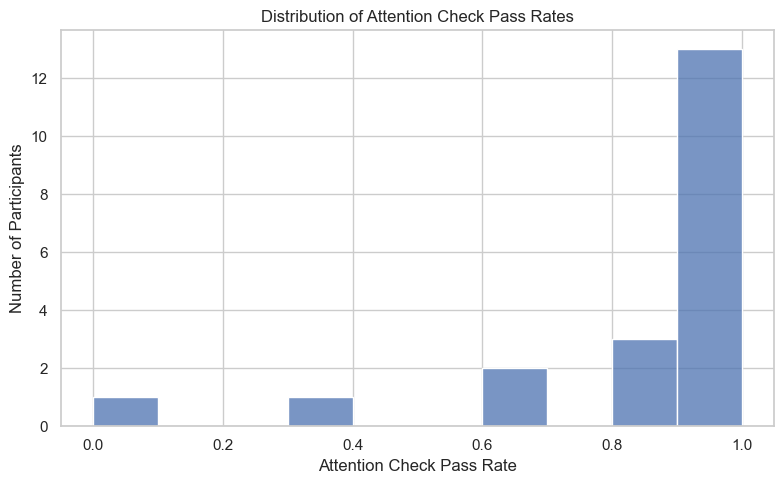

In [101]:
plt.figure(figsize=(8, 5))
sns.histplot(data=individual_summary, x='Attention_Pass_Rate', bins=10, kde=False)
plt.title('Distribution of Attention Check Pass Rates')
plt.xlabel('Attention Check Pass Rate')
plt.ylabel('Number of Participants')
plt.tight_layout()
plt.show()


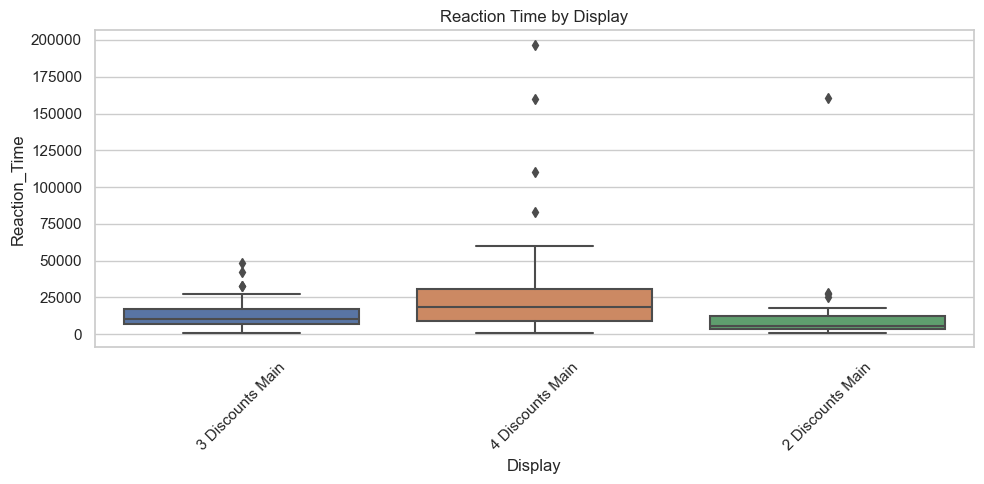

In [89]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Display', y='Reaction_Time')
plt.title('Reaction Time by Display')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

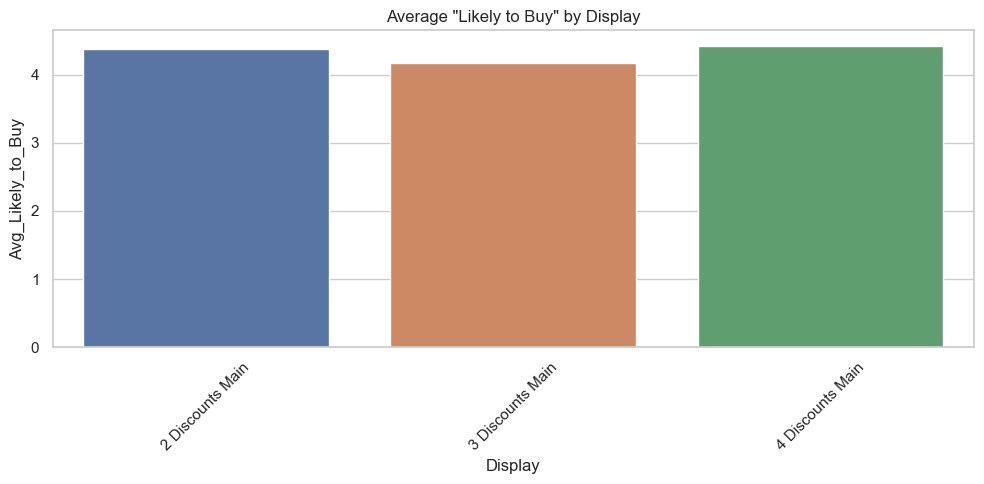

In [90]:
plt.figure(figsize=(10, 5))
sns.barplot(data=display_summary, x='Display', y='Avg_Likely_to_Buy')
plt.title('Average "Likely to Buy" by Display')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

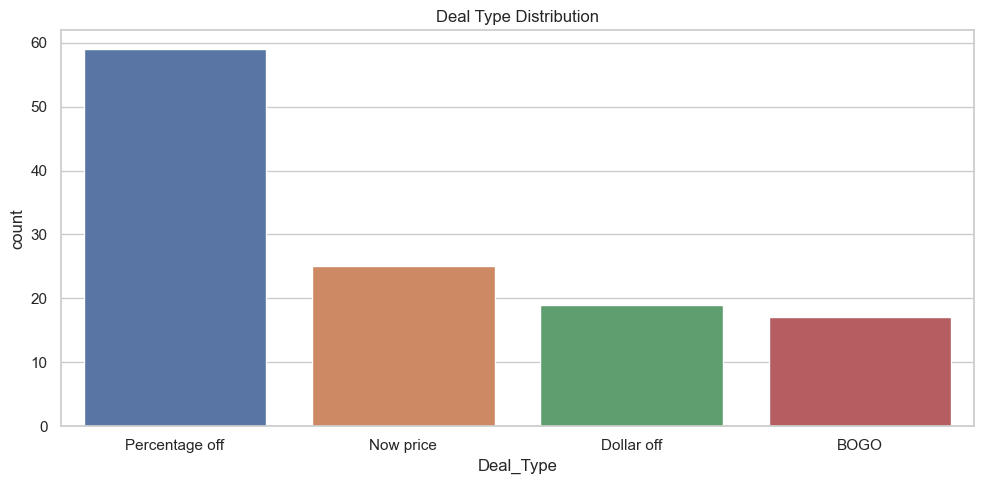

In [91]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Deal_Type', order=df['Deal_Type'].value_counts().index)
plt.title('Deal Type Distribution')
plt.tight_layout()
plt.show()

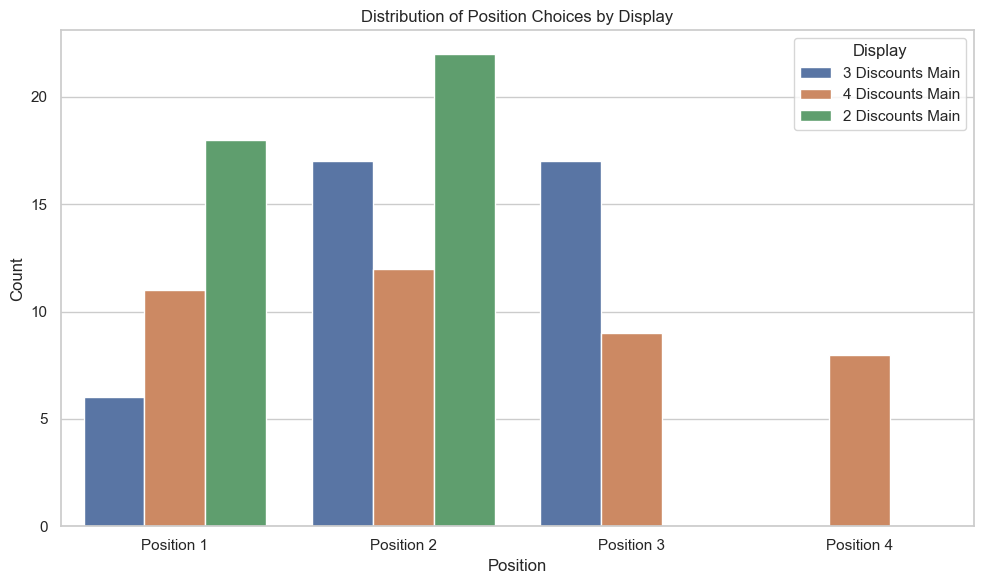

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Position', hue='Display', order=sorted(df['Position'].dropna().unique()))
plt.title('Distribution of Position Choices by Display')
plt.xlabel('Position')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


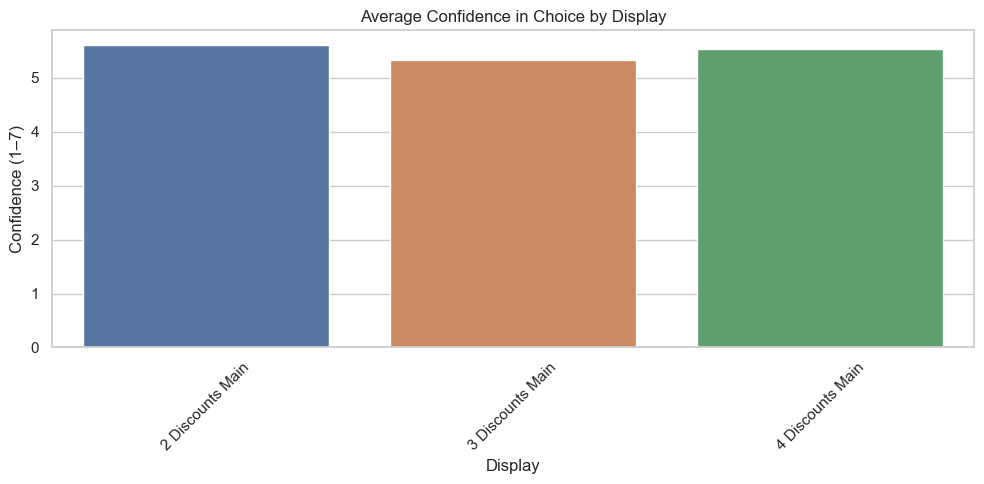

In [119]:
plt.figure(figsize=(10, 5))
sns.barplot(data=display_summary, x='Display', y='Avg_Confidence')
plt.title('Average Confidence in Choice by Display')
plt.xlabel('Display')
plt.ylabel('Confidence (1–7)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


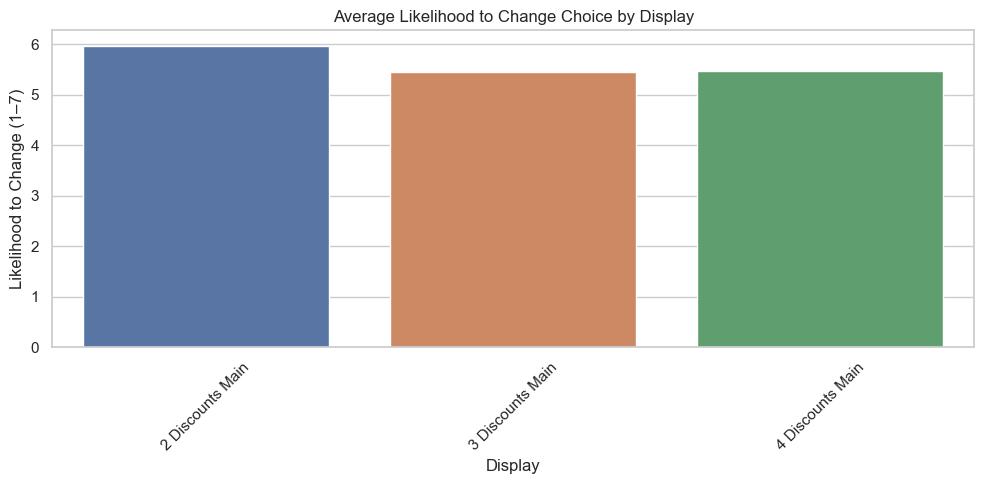

In [120]:
plt.figure(figsize=(10, 5))
sns.barplot(data=display_summary, x='Display', y='Avg_Likely_to_Change')
plt.title('Average Likelihood to Change Choice by Display')
plt.xlabel('Display')
plt.ylabel('Likelihood to Change (1–7)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


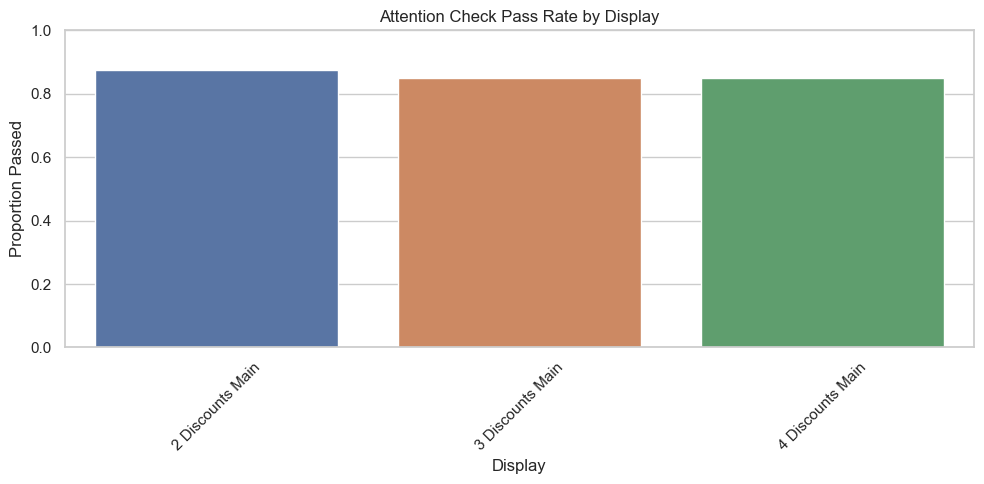

In [95]:
plt.figure(figsize=(10, 5))
sns.barplot(data=display_summary, x='Display', y='Attention_Pass_Rate')
plt.title('Attention Check Pass Rate by Display')
plt.xlabel('Display')
plt.ylabel('Proportion Passed')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [97]:
df

,Participant_ID,Display,Spreadsheet:_Product,Response,Position,Reaction_Time,Deal_Type,Likely_to_buy,Confident_in_choice,Likely_to_change,Attention_Check_Response,Why_Response,Display_Num,Attention_Check_Pass
0,13397659,3 Discounts Main,Tablet Case.png,$25 (Deal: 10% off),Position 1,18598.5,Percentage off,3,1,7,3,"It's all the same, but 10% looks bigger.",3,True
1,13397659,3 Discounts Main,Phone Charger.png,$15 (Deal: 10% off),Position 3,6847.8,Percentage off,1,5,7,3,All the same price so I chose the cheapest,3,True
2,13397659,4 Discounts Main,DSLR Lens.png,$960 (Deal: buy 1 get 1 free),Position 1,13848.7,BOGO,2,5,6,4,It saves more so I can sell the duplicate one,4,True
3,13397659,4 Discounts Main,Sofa.png,$1000 (Deal: $200 off),Position 3,13065.3,Dollar off,2,5,6,4,Too big so I can't store it and sell it.,4,True
4,13397659,2 Discounts Main,Skincare Kit.png,$90 (Deal: 15% off),Position 1,14565.8,Percentage off,5,6,6,2,15 looks bigger though they are all the same,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,13444141,2 Discounts Main,Earbuds.png,$80 (Deal: 10% off),Position 2,17493.1,Percentage off,4,5,6,2,I chose the percentage in case this could pote...,2,True
116,13444141,2 Discounts Main,Mechanical Keyboard.png,$120 (Deal: 10% off),Position 1,11680.7,Percentage off,3,4,6,2,"Same reason as the headphones, I would hope th...",2,True
117,13444141,3 Discounts Main,Desk Lamp.png,$40 (Deal: now $36),Position 2,12262.0,Now price,4,6,6,2,I would hope I can apply another discount if a...,3,False
118,13444141,4 Discounts Main,DSLR Lens.png,$600 (Deal: now $480),Position 4,60085.4,Now price,1,4,5,3,I avoided BOGO thinking in case I need to retu...,4,False


## Manipulation

In [98]:
from scipy.stats import chi2_contingency

# Step 1: Create a table with Display as rows and Pass/Fail counts as columns
contingency_table = pd.crosstab(df['Display'], df['Attention_Check_Pass'])

# Step 2: Run the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Print the result
print(f"Chi² = {chi2:.2f}, p = {p:.3f}")


Chi² = 0.14, p = 0.934


In [99]:
contingency_table

Attention_Check_Pass,False,True
Display,,
2 Discounts Main,5,35
3 Discounts Main,6,34
4 Discounts Main,6,34
